## G2M insight for Cab Investment firm ( Must for all Specialization) 

The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

You should fully investigate and understand each data set.

    Review the Source Documentation
    Understand the field names and data types
    Identify relationships across the files
    Field/feature transformations
    Determine which files should be joined versus which ones should be appended
    Create master data and explain the relationship
    Identify and remove duplicates
    Perform other analysis like NA value and outlier detection


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_csv("/home/equipo/Documents/Job/Data Glacier/DataSets/Cab_Data.csv")


FileNotFoundError: [Errno 2] No such file or directory: '/home/equipo/Documents/Job/Data Glacier/DataSets/Cab_Data.csv'

In [ ]:
df2 = pd.read_csv("/home/equipo/Documents/Job/courses/DataSets/City.csv")

In [ ]:
df3 = pd.read_csv("/home/equipo/Documents/Job/courses/DataSets/Transaction_ID.csv")

In [5]:
df1.head()

NameError: name 'df1' is not defined

In [24]:
df2.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [25]:
df3.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [26]:
# Assume df1, df2, df3 are your three DataFrames
# And they all share a common column, e.g., 'ID'

merged_df = pd.merge(df1, df2, on='City', how='inner')      # First merge
#merged_df = pd.merge(merged_df, df3, on='ID', how='inner')  # Second merge
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [27]:
merged_df = pd.merge(merged_df, df3, on='Transaction ID', how='inner')  # Second merge


In [28]:
merged_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card


Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

    Which company has maximum cab users at a particular time period?
    Does margin proportionally increase with increase in number of customers?
    What are the attributes of these customer segments?


In [2]:
sns.histplot(merged_df["Users"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')
plt.xticks(rotation=45)

NameError: name 'sns' is not defined

Text(0.5, 1.0, 'Users')

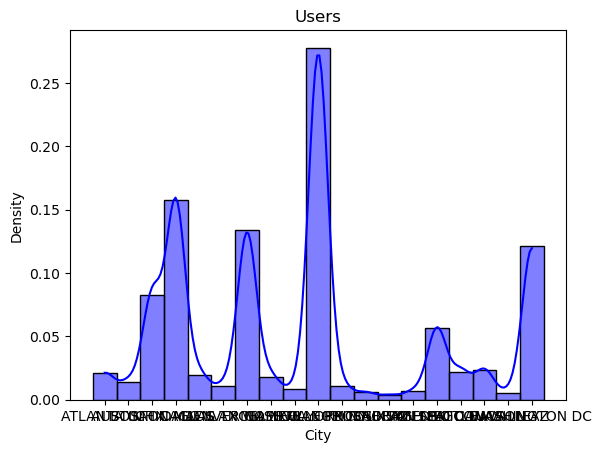

In [36]:
sns.histplot(merged_df["City"], color='blue', kde=True, bins=20, stat='density')
plt.title('Users')

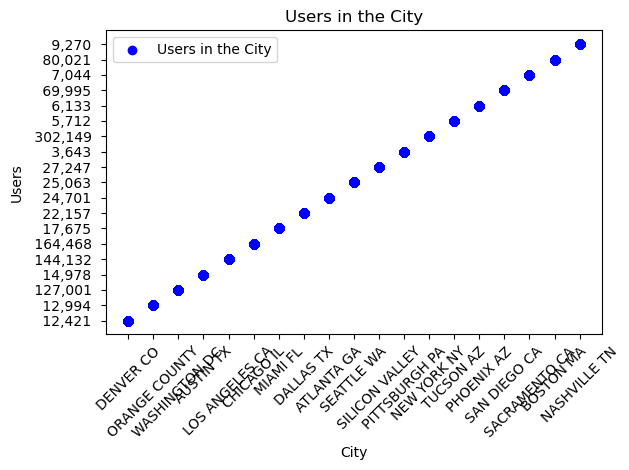

In [45]:
sorted_df = merged_df.sort_values(by='Users')  # or by='Users', ascending=False for reverse order

x = sorted_df["City"]
y = sorted_df["Users"]

plt.scatter(x, y, label='Users in the City', color='blue')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Users')
plt.title('Users in the City')
plt.legend()
plt.tight_layout()  # Avoid label cutoff
plt.show()
